# **DogsNCats Neuron**

### In this notebook we will create a neuron that can distinguish between dogs and cats pictures.

---

## **0- Single neuron model**

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm

def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def model(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

def log_loss(A, y, eps=1e-15):
    return 1 / len(y) * np.sum(-y * np.log(A + eps) - (1 - y) * np.log(1 - A + eps))

def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

def gradient_descent(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

def simple_artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = gradient_descent(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100, ):
    W, b = initialisation(X_train)

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i %10 == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = gradient_descent(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()


    return (W, b)

## **I- Dataset**

Let's load the dataset and see some examples. It contains 1000 pictures of dogs and cats.

In [2]:
def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

(array([0., 1.]), array([100, 100]))
(1000, 64, 64)
(1000, 1)
(200, 64, 64)
(200, 1)


/home/lois/.local/lib/python3.10/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


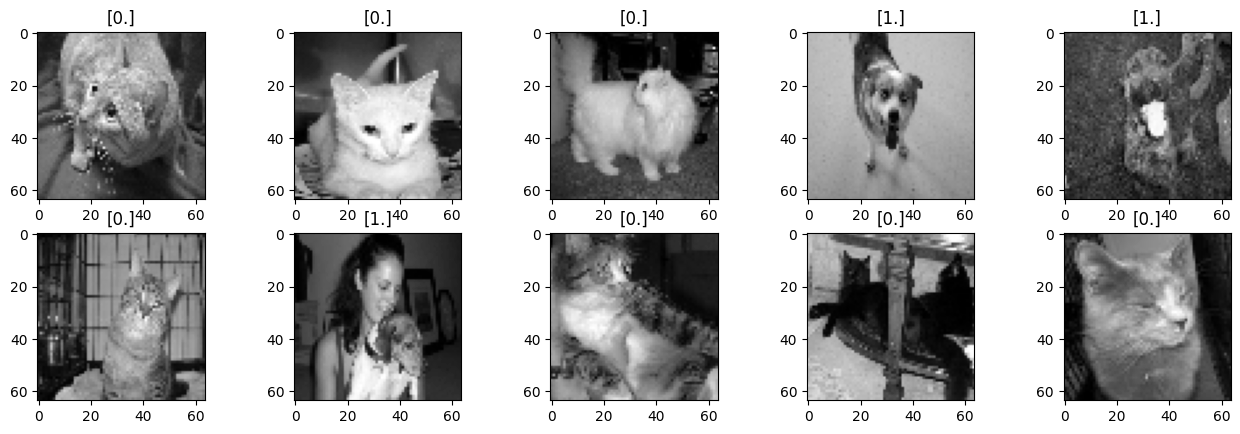

In [3]:
X_train, y_train, X_test, y_test = load_data()


print(np.unique(y_test, return_counts=True))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

plt.figure(figsize=(16,10))
for i in range(1, 11):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
plt.show()


The single neuron we created in the `neuron.ipynb` notebook wa able to train on arrays of 2 dimensions. However, the dataset we are going to use contains images of 3 dimensions (index, height, width). Hence, in ordre for our single neuron model to train on the dataset we will need to flatten the images and cast the 64x64 pixels into a 1-dimension array.

In [4]:
X_train_reshaped = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshaped = X_test.reshape(X_test.shape[0], -1) / X_train.max()

X_train_reshaped.shape
X_test_reshaped.shape


(200, 4096)

0.514


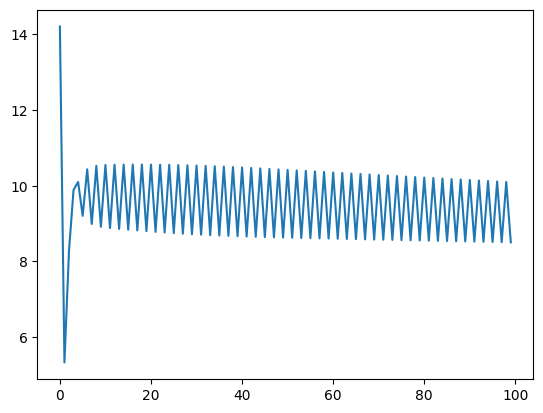

In [5]:
W, b = simple_artificial_neuron(X_train_reshaped, y_train, learning_rate = 0.1, n_iter = 100)

These oscillations are due to the learning rate being too high. When the learning rate is too high, the gradient descent algorithm can overshoot the minimum and end up oscillating around it. In this case, we can reduce the learning rate to a lower value.

100%|██████████| 2000/2000 [00:39<00:00, 50.57it/s]


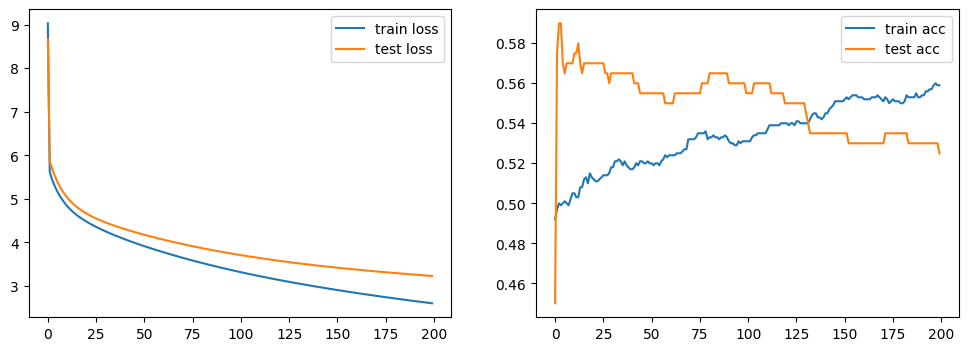

In [6]:
W, b = artificial_neuron(X_train_reshaped, y_train, X_test_reshaped, y_test, learning_rate = 0.01, n_iter = 2000)

By plotting the accuracy and the cost function of the test set as well, we can detect overfitting. If the accuracy of the training set is much higher than the accuracy of the test set, then the model is overfitting. In this case, we can reduce the number of epochs or add more data to the training set.

Before trying to improve the model, we should first try to improve the dataset. Either way, remember that the model is a single neuron, so it will never be able to achieve a high accuracy. That's why we will need to create a neural network in the next notebooks.